In [112]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option("display.width", 500)
pd.set_option("display.max_colwidth", 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

In [19]:
df = pd.read_csv("../data/processed/federal/despesas/gastos diretos/ufpr_201301_201701.csv")

df['data'] = pd.to_datetime(df.data, format="%Y-%m-%d")

df['nome_favorecido'] = df.nome_favorecido.str.strip()

C:\Users\abevi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Recebimentos, no mesmo mês, de auxílio estudante e pesquisador

In [61]:
ggg = df[df.elemento_despesa.isin(['Auxílio Financeiro a Estudantes', 'Auxílio Financeiro a Pesquisadores'])]\
.groupby([df.nome_favorecido, df.data.dt.year, df.data.dt.month, df.elemento_despesa]).sum().unstack()

os_2_mask = ggg\
.notnull()\
.all(axis=1)

os_2 = ggg[os_2_mask]

valor                                   
elemento_despesa Auxílio Financeiro a Estudantes Auxílio Financeiro a Pesquisadores
data data                                                                          
2014 4                                   7500.00                           28900.00
     8                                  22700.00                           26900.00
     11                                  7800.00                           12500.00
     12                                 17300.00                           21800.00
2015 1                                   9500.00                           15600.00
     3                                   9500.00                            9500.00
     4                                   9500.00                            9500.00
     5                                   9500.00                            9500.00
     7                                   9500.00                            9500.00
2016 3                                   3500.00                            7500.00

### Os top 25 total valores recebidos dos que receberam em algum mês auxílio estudante e auxílio pesquisador

In [ ]:
os_2_nomes = os_2.index.get_level_values('nome_favorecido').unique()

os_2_nomes_top_25 = df[df.nome_favorecido.isin(os_2_nomes)].groupby('nome_favorecido').valor.sum().nlargest(25).index

r = pd.pivot_table(df[df.nome_favorecido.isin(os_2_nomes_top_25)],
                   index='nome_favorecido',
                   columns='elemento_despesa',
                   values='valor',
                   aggfunc='sum')

r['total'] = r.sum(axis=1)

In [147]:
r.sort_values('total', ascending=False)

elemento_despesa,Auxílio Financeiro a Estudantes,Auxílio Financeiro a Pesquisadores,Outros Serviços de Terceiros - Pessoa Física,total
nome_favorecido,,,,
MARIA ALBA DE AMORIM SUAREZ,214439.00,525050.00,nan,739489.00
PEDRO AMORIM SUAREZ CAMPOS,194600.00,443776.10,nan,638376.10
CHERRI FRANCINE CONCER,168900.00,455500.00,nan,624400.00
ANDREA CRISTINE BEZERRA,157500.00,431350.00,nan,588850.00
DANIEL BORGES MAIA,167300.00,415850.00,nan,583150.00
DAYANE SILVA DOS SANTOS,179700.00,372750.00,nan,552450.00
EDER RIBEIRO TIDRE,228400.00,286950.00,nan,515350.00
MARCOS AURELIO FISCHER,245400.00,201650.00,nan,447050.00
PAULO ALLAN ROLAND BOGADO,129600.00,182450.00,nan,312050.00


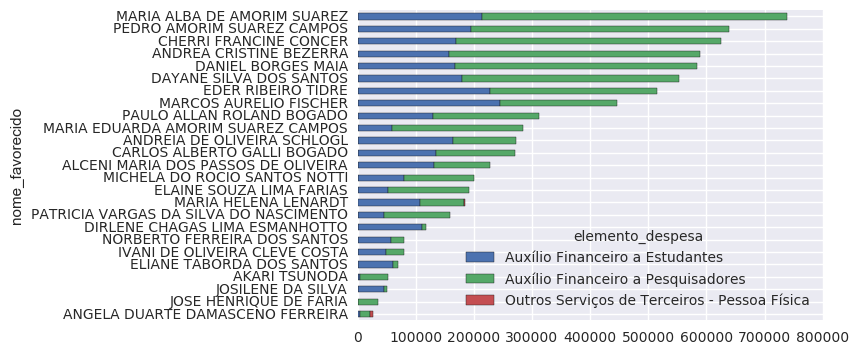

In [149]:
plt.figure(figsize=(18, 12))
r.sort_values('total')[r.columns.drop('total')]\
.plot(kind='barh', stacked=True)

Total recebido 

In [132]:
total_uau = r['Auxílio Financeiro a Pesquisadores'].sum()
total_uau

4507844.1

Total de despesas com Auxílio Financeiro a Pesquisadores

In [133]:
total_geral = df[df.elemento_despesa == 'Auxílio Financeiro a Pesquisadores'].sum()
total_geral

valor   16539761.54
dtype: float64

Porcentagem

In [144]:
pct = ((total_uau / total_geral) * 100).ix[0] # rs

"{0:.5f}%".format(pct)

'27.25459%'

### Quem recebeu mais de auxílio a pesquisadores

In [127]:
a_pesquisadores = df[df.elemento_despesa.isin(['Auxílio Financeiro a Pesquisadores'])]

total_auxilio = a_pesquisadores.valor.sum()

total_por_favorecido = a_pesquisadores.groupby('nome_favorecido').valor.sum()

total_por_favorecido.nlargest(10)

nome_favorecido
MARIA ALBA DE AMORIM SUAREZ          525050.00
CHERRI FRANCINE CONCER               455500.00
PEDRO AMORIM SUAREZ CAMPOS           443776.10
ANDREA CRISTINE BEZERRA              431350.00
DANIEL BORGES MAIA                   415850.00
DAYANE SILVA DOS SANTOS              372750.00
EDER RIBEIRO TIDRE                   286950.00
ANDRE ANDRIAN PADIAL                 227027.79
MARIA EDUARDA AMORIM SUAREZ CAMPOS   224650.00
MARCOS AURELIO FISCHER               201650.00
Name: valor, dtype: float64